Dinh Hoang Viett Phuong - 301123263

In [1]:
# Importing TensorFlow and necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the Dataset
df = pd.read_csv('D:\\Download\\student_data.csv', skiprows=24, header=1)
print(df.head())

        2.5         2  3  4  6  1  2.1  2.2  2.3 1.1 3.1    ? ?.1  7  1.2
0      4.25  3.923077  1  1  6  2    1    1    1   2   3   92  41  9    1
1  3.020833  2.321429  3  4  6  1    2    2    2   2   3    ?   ?  8    1
2     4.275  4.326923  1  2  6  1    1    1    1   2   3   97   ?  9    1
3  4.357143  4.326087  1  2  6  2    1    1    2   2   3  101  45  9    1
4  2.210526     1.375  1  2  6  2    1    1    2   1   1   68  20  7    0


In [3]:
# Read the CSV file, skip the first 24 rows and set no header initially
df = pd.read_csv('D:\\Download\\student_data.csv', skiprows=24, header=None)
df.replace('?', np.nan, inplace=True)

# Assign headers to the DataFrame
headers = [
    "First Term Gpa", "Second Term Gpa", "First Language", "Funding",
    "School", "FastTrack", "Coop", "Residency", "Gender",
    "Previous Education", "Age Group", "High School Average Mark",
    "Math Score", "English Grade", "FirstYearPersistence"
]
df.columns = headers

# Display the DataFrame
print(df.head())

  First Term Gpa Second Term Gpa First Language  Funding  School  FastTrack  \
0              0               0              1        2       6          2   
1            2.5               2              3        4       6          1   
2           4.25        3.923077              1        1       6          2   
3       3.020833        2.321429              3        4       6          1   
4          4.275        4.326923              1        2       6          1   

   Coop  Residency  Gender Previous Education Age Group  \
0     1          1       2                  1         1   
1     2          2       2                  1         3   
2     1          1       1                  2         3   
3     2          2       2                  2         3   
4     1          1       1                  2         3   

  High School Average Mark Math Score English Grade  FirstYearPersistence  
0                       59         16             7                     1  
1                 

In [4]:
# Check for missing values in each column
print("Missing values in each column: \n", df.isnull().sum())

Missing values in each column: 
 First Term Gpa               17
Second Term Gpa             160
First Language              111
Funding                       0
School                        0
FastTrack                     0
Coop                          0
Residency                     0
Gender                        0
Previous Education            4
Age Group                     4
High School Average Mark    743
Math Score                  462
English Grade                45
FirstYearPersistence          0
dtype: int64


In [5]:
# Impute missing values for numerical columns with mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Impute missing values for categorical columns with mode
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that all missing values have been filled
missing_values_after = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values after imputation:
 First Term Gpa              0
Second Term Gpa             0
First Language              0
Funding                     0
School                      0
FastTrack                   0
Coop                        0
Residency                   0
Gender                      0
Previous Education          0
Age Group                   0
High School Average Mark    0
Math Score                  0
English Grade               0
FirstYearPersistence        0
dtype: int64


In [6]:
# Generating summary statistics
summary_statistics = df.describe()
print(summary_statistics)

           Funding  School    FastTrack         Coop    Residency  \
count  1437.000000  1437.0  1437.000000  1437.000000  1437.000000   
mean      2.926931     6.0     1.741823     1.695198     1.406402   
std       1.257658     0.0     0.437784     0.460484     0.491332   
min       1.000000     6.0     1.000000     1.000000     1.000000   
25%       2.000000     6.0     1.000000     1.000000     1.000000   
50%       2.000000     6.0     2.000000     2.000000     1.000000   
75%       4.000000     6.0     2.000000     2.000000     2.000000   
max       9.000000     6.0     2.000000     2.000000     2.000000   

            Gender  FirstYearPersistence  
count  1437.000000           1437.000000  
mean      1.774530              0.791928  
std       0.419699              0.406070  
min       1.000000              0.000000  
25%       2.000000              1.000000  
50%       2.000000              1.000000  
75%       2.000000              1.000000  
max       3.000000              1.

In [7]:
# Handling non-numeric columns for mode calculation
for column in df.select_dtypes(include=['object', 'category']):
    print(f"Mode of {column}: {df[column].mode()[0]}")

Mode of First Term Gpa: 0
Mode of Second Term Gpa: 0
Mode of First Language: 1
Mode of Previous Education: 1
Mode of Age Group: 3
Mode of High School Average Mark: 78
Mode of Math Score: 48
Mode of English Grade: 9


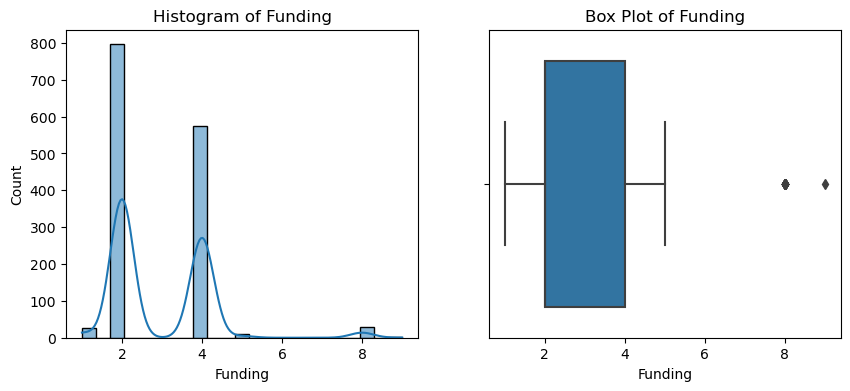

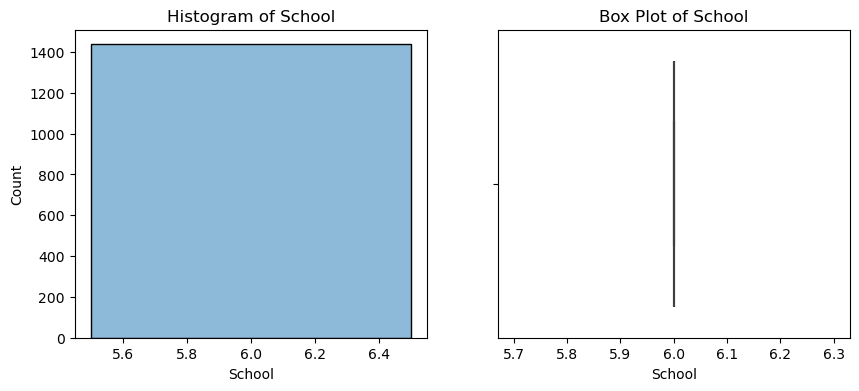

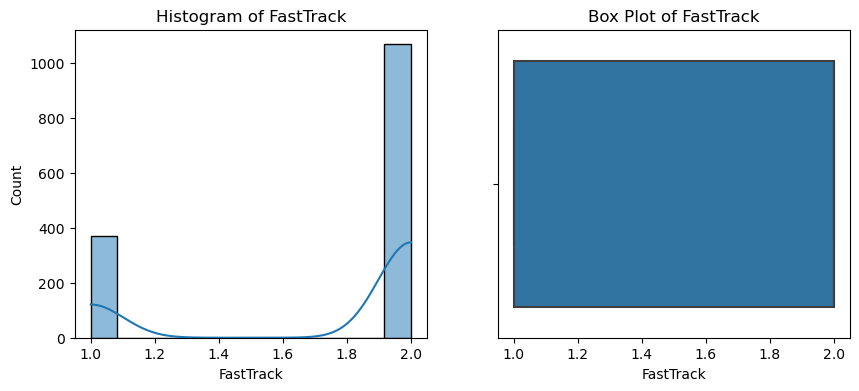

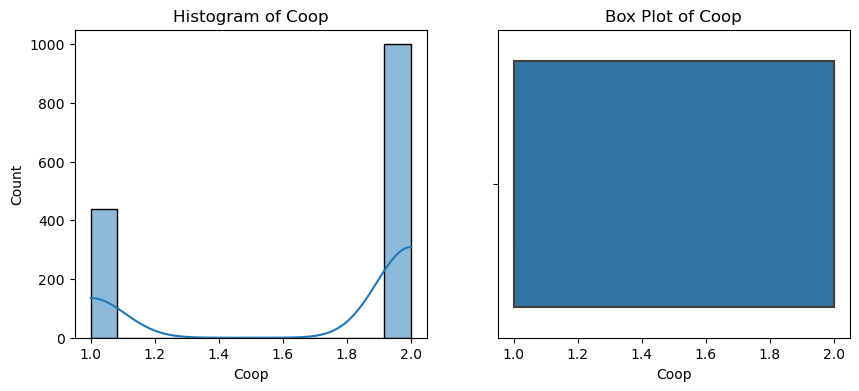

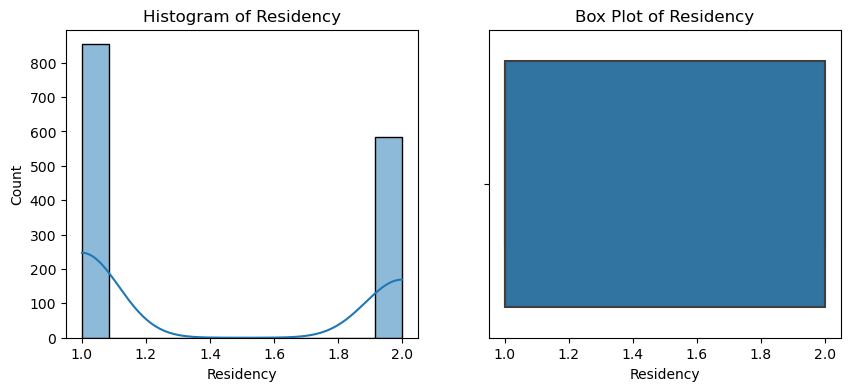

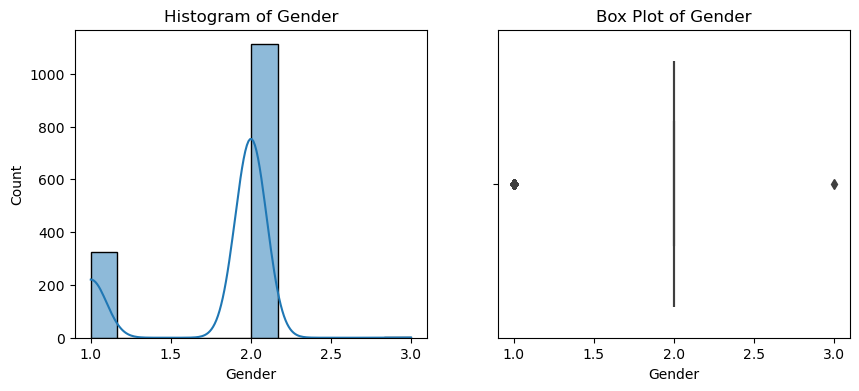

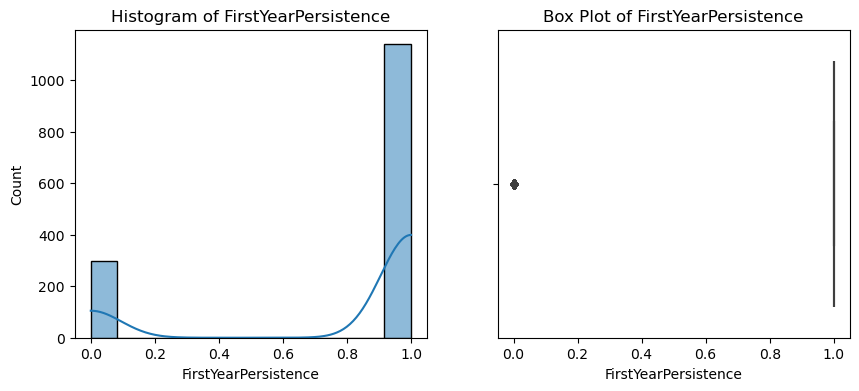

In [8]:
# Visualizing distributions of various features
for column in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    
    plt.show()

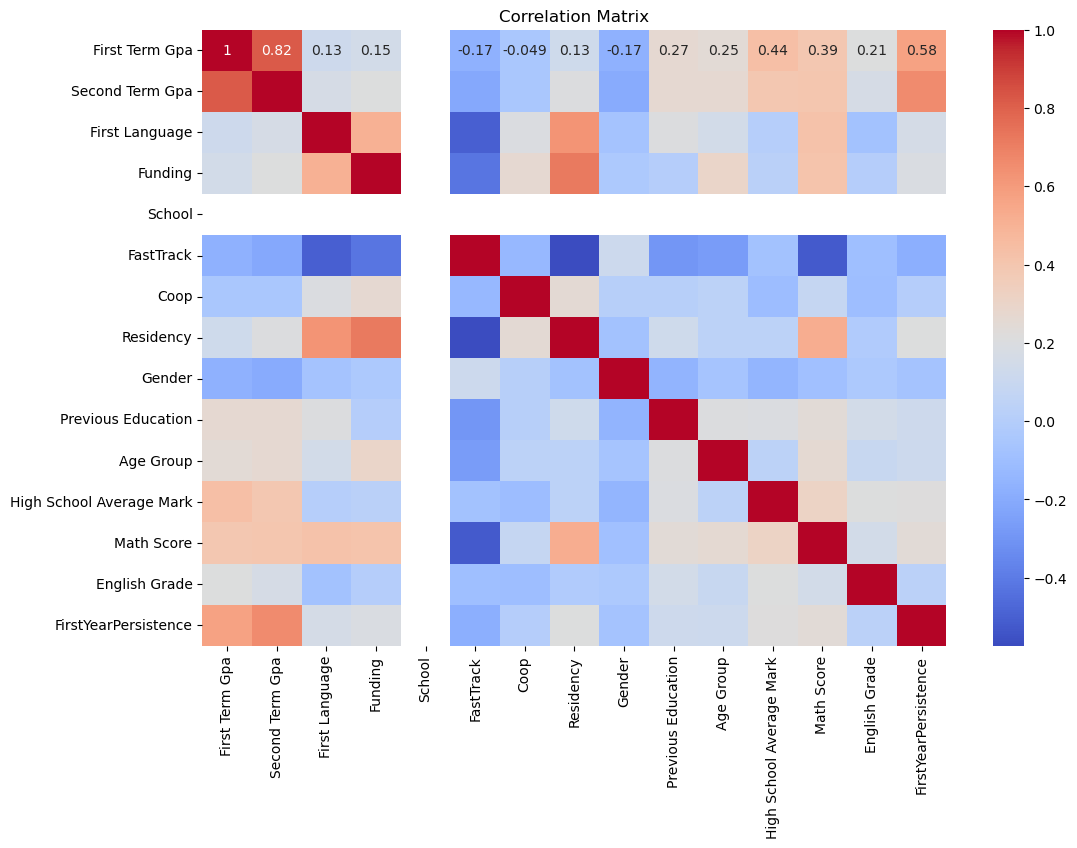

In [9]:
# Identifying potential correlations between features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Convert categorical features to numerical
encoder = OneHotEncoder(sparse=False)
categorical_columns = ['First Language', 'Funding', 'School', 'FastTrack', 'Coop', 'Residency', 'Gender', 'Previous Education', 'Age Group']
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]))
df_encoded.columns = encoder.get_feature_names_out(categorical_columns)
df.drop(categorical_columns ,axis=1, inplace=True)
df = pd.concat([df, df_encoded], axis=1)

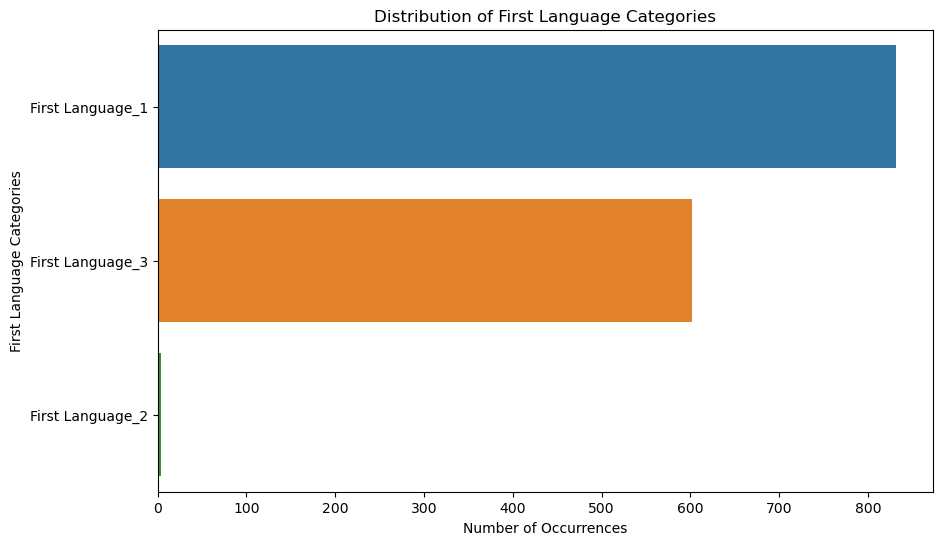

In [11]:
# Visualize the distribution of the 'First Language' encoded features
first_language_features = [col for col in df_encoded.columns if 'First Language' in col]
df_first_language_distribution = df_encoded[first_language_features].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=df_first_language_distribution.values, y=df_first_language_distribution.index)
plt.title('Distribution of First Language Categories')
plt.xlabel('Number of Occurrences')
plt.ylabel('First Language Categories')
plt.show()

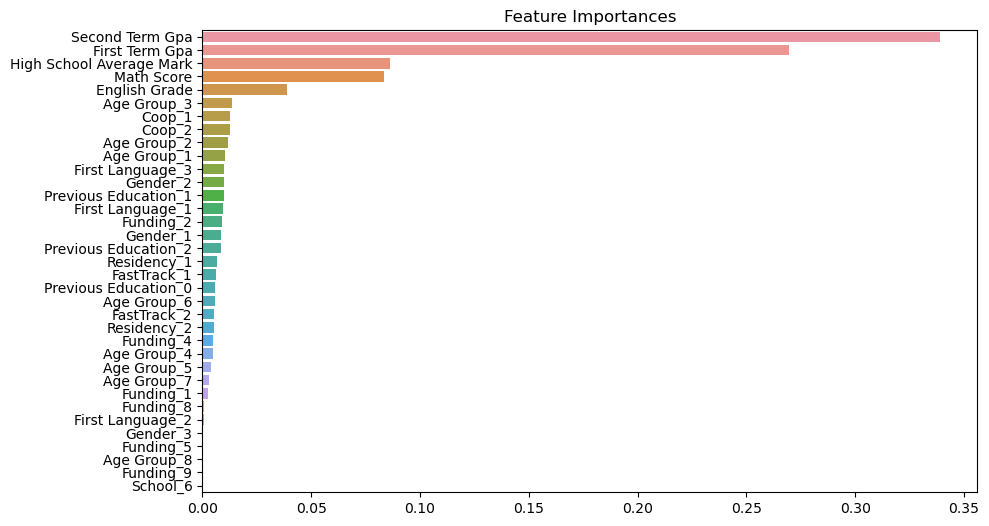

In [12]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop('FirstYearPersistence', axis=1)  # Features
y = df['FirstYearPersistence']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Assume X_train and y_train are your training data and labels
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Plot feature importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
sns.barplot(y=X_train.columns[indices], x=importances[indices])
plt.show()

In [13]:
# Standardization
scaler = StandardScaler()
numerical_columns = ['First Term Gpa', 'Second Term Gpa', 'High School Average Mark', 'Math Score', 'English Grade']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop('FirstYearPersistence', axis=1), df['FirstYearPersistence'], test_size=0.2, random_state=42)

# Creat TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

# Batching and Prefetching
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)